In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
sentences = []
for i in range(0,len(train['id'])):
    x=''
    y=''
    if(train['keyword'][i]==train['keyword'][i]):
        x = train['keyword'][i].replace("%20"," ")
    if(train['location'][i]==train['location'][i]):
        y = train['location'][i]
    sentence = x + ' . ' + y + ' . ' + train['text'][i] + ' .'
    sentences += [sentence]

In [4]:
print(sentences[0:5])

[' .  . Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all .', ' .  . Forest fire near La Ronge Sask. Canada .', " .  . All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected .", ' .  . 13,000 people receive #wildfires evacuation orders in California  .', ' .  . Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  .']


In [5]:
y_train = []
for i in range(0,len(train['id'])):
    y_train += [[train['target'][i]]]
y_train = np.array(y_train)
print(y_train)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [6]:
pos = 0
neg = 0
for i in y_train:
    if i[0] == 0:
        neg += 1
    else:
        pos += 1
print(pos)
print(neg)

3271
4342


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
# Model configuration
additional_metrics = ['accuracy']
batch_size = 500
embedding_output_dims = 10
loss_function = BinaryCrossentropy()
max_sequence_length = 20
num_distinct_words = 300
number_of_epochs = 200
optimizer = Adam()
validation_split = 0.10
verbosity_mode = 1
dropout = 0.7
lstm_dim = 5

In [9]:
tokenizer = Tokenizer(num_words=num_distinct_words, lower= 1, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [10]:
print(word_index.items())

dict_items([('<OOV>', 1), ('co', 2), ('t', 3), ('http', 4), ('the', 5), ('a', 6), ('in', 7), ('to', 8), ('of', 9), ('and', 10), ('i', 11), ('is', 12), ('on', 13), ('for', 14), ('you', 15), ('my', 16), ('with', 17), ('it', 18), ('that', 19), ('at', 20), ('by', 21), ('this', 22), ('new', 23), ('from', 24), ('https', 25), ('be', 26), ('are', 27), ('up', 28), ('was', 29), ('have', 30), ('fire', 31), ('like', 32), ('amp', 33), ('me', 34), ('as', 35), ('but', 36), ('just', 37), ('so', 38), ('not', 39), ('your', 40), ('emergency', 41), ('usa', 42), ('out', 43), ('no', 44), ('all', 45), ('will', 46), ('after', 47), ('disaster', 48), ('an', 49), ('has', 50), ("i'm", 51), ('when', 52), ('if', 53), ('body', 54), ('we', 55), ('get', 56), ('2', 57), ('via', 58), ('now', 59), ('burning', 60), ('storm', 61), ('or', 62), ('more', 63), ('buildings', 64), ('about', 65), ('suicide', 66), ('news', 67), ('they', 68), ('california', 69), ('he', 70), ('people', 71), ('what', 72), ('one', 73), ('how', 74), ('

In [11]:
f = open('F:/GloVe Word Embeddings/glove.6B.50d.txt', encoding="utf8")

In [12]:
embeddings_index = dict()
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

In [13]:
#print(embeddings_index['!'])
#embeddings_index['eos']=np.zeros(50)
#print(embeddings_index['eos'])
#for i in range(0,len(embeddings_index['eos'])):
#    embeddings_index['eos'][i]=(embeddings_index['.'][i]+embeddings_index['!'][i]+embeddings_index[','][i])/3
#print(embeddings_index['eos'])

In [14]:
embedding_matrix = np.zeros((num_distinct_words,50))

for word, i in word_index.items():
    if i>=num_distinct_words:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [15]:
sequences = tokenizer.texts_to_sequences(sentences)
print(max([len(x) for x in sequences]))

38


In [16]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [17]:
test_sentences = []
for i in range(0,len(test['id'])):
    x=''
    y=''
    if(test['keyword'][i]==test['keyword'][i]):
        x = test['keyword'][i].replace("%20"," ")
    if(test['location'][i]==test['location'][i]):
        y = test['location'][i]
    sentence = x + ' . ' + y + ' . ' + train['text'][i] + ' .'
    test_sentences += [sentence]

In [18]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
print(test_sequences[:20])

[[137, 1, 27, 5, 1, 9, 22, 170, 171, 1, 1, 97, 45], [116, 31, 1, 1, 1, 1, 147], [45, 1, 1, 8, 1, 7, 1, 27, 168, 1, 21, 1, 44, 1, 183, 62, 1, 7, 1, 1, 27, 1], [1, 1, 71, 1, 1, 183, 1, 7, 69], [37, 123, 1, 22, 1, 24, 1, 1, 35, 201, 24, 1, 1, 81, 6, 1], [1, 1, 69, 1, 1, 1, 7, 1, 1, 1, 8, 1, 1, 31, 1, 1], [160, 48, 1, 1, 1, 1, 174, 9, 1, 7, 1, 1, 1, 1], [51, 13, 1, 9, 5, 1, 10, 11, 89, 132, 6, 31, 7, 5, 1], [1, 49, 41, 183, 1, 59, 7, 5, 1, 1, 5, 1], [51, 1, 19, 5, 1, 12, 1, 8, 137, 1], [1, 71, 1, 24, 5, 208, 1, 38, 1], [1, 187, 1, 12, 1, 1, 1, 1, 6, 1, 11, 1, 7, 187, 1, 72, 277, 11, 1, 85, 72, 277, 11, 1, 85, 1, 174], [1, 174, 1, 1, 1, 1, 62, 1, 1, 1, 1, 1], [160, 7, 1, 1, 55, 1, 1], [148, 8, 1, 1, 13, 1, 7, 1, 157, 94, 1], [1, 105, 1, 28, 128], [1, 1, 1, 1, 1, 1, 11, 130, 1], [1, 1, 1, 12, 1], [1, 1, 13, 1, 16, 157, 12, 38, 1], [1, 1, 1, 1, 72, 6, 1]]


In [19]:
import random
mapIndexPosition = list(zip(sequences, y_train))
random.shuffle(mapIndexPosition)
sequences, y_train = zip(*mapIndexPosition)
sequence = np.array(sequences)
y_train = np.array(y_train)

In [20]:
padded = pad_sequences(sequences, padding='pre',maxlen =max_sequence_length, truncating = 'post')
print(padded.shape)
test_padded = pad_sequences(test_sequences, padding='pre',maxlen =max_sequence_length, truncating = 'post')
print(test_padded.shape)

(7613, 20)
(3263, 20)


In [21]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [22]:
padded_split_test = padded[6000:]
y_split_test = y_train[6000:]
padded = padded[:6000]
y_train = y_train[:6000]

In [23]:
# Disable eager execution
tf.compat.v1.disable_eager_execution()

In [24]:
# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words,50,weights=[embedding_matrix],input_length=max_sequence_length,trainable=False))
model.add(LSTM(lstm_dim))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [25]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [26]:
# Give a summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            15000     
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 1120      
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 16,126
Trainable params: 1,126
Non-trainable params: 15,000
_________________________________________________________________


In [27]:
# Train the model
history = model.fit(padded, y_train, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Train on 5400 samples, validate on 600 samples
Epoch 1/200
5400/5400 [==============================] - 0s 31us/sample - loss: 0.7456 - accuracy: 0.4765 - val_loss: 0.7200 - val_accuracy: 0.3817
Epoch 2/200
5400/5400 [==============================] - 0s 21us/sample - loss: 0.7171 - accuracy: 0.5026 - val_loss: 0.7031 - val_accuracy: 0.4533
Epoch 3/200
5400/5400 [==============================] - 0s 20us/sample - loss: 0.7026 - accuracy: 0.5133 - val_loss: 0.6905 - val_accuracy: 0.5300
Epoch 4/200
5400/5400 [==============================] - 0s 20us/sample - loss: 0.6864 - accuracy: 0.5531 - val_loss: 0.6800 - val_accuracy: 0.5633
Epoch 5/200
5400/5400 [==============================] - 0s 20us/sample - loss: 0.6747 - accuracy: 0.5781 - val_loss: 0.6703 - val_accuracy: 0.5633
Epoch 6/200
5400/5400 [==============================] - 0s 18us/sample - loss: 0.6692 - accuracy: 0.5970 - val_loss: 0.6601 - val_accuracy: 0.6067
Epoch 7/200
5400/5400 [==============================] - 0s 16us/

Epoch 56/200
5400/5400 [==============================] - 0s 19us/sample - loss: 0.5399 - accuracy: 0.7350 - val_loss: 0.5245 - val_accuracy: 0.7517
Epoch 57/200
5400/5400 [==============================] - 0s 15us/sample - loss: 0.5454 - accuracy: 0.7283 - val_loss: 0.5205 - val_accuracy: 0.7550
Epoch 58/200
5400/5400 [==============================] - 0s 15us/sample - loss: 0.5395 - accuracy: 0.7396 - val_loss: 0.5195 - val_accuracy: 0.7567
Epoch 59/200
5400/5400 [==============================] - 0s 15us/sample - loss: 0.5419 - accuracy: 0.7391 - val_loss: 0.5212 - val_accuracy: 0.7483
Epoch 60/200
5400/5400 [==============================] - 0s 15us/sample - loss: 0.5417 - accuracy: 0.7370 - val_loss: 0.5197 - val_accuracy: 0.7500
Epoch 61/200
5400/5400 [==============================] - 0s 18us/sample - loss: 0.5449 - accuracy: 0.7370 - val_loss: 0.5184 - val_accuracy: 0.7600
Epoch 62/200
5400/5400 [==============================] - 0s 17us/sample - loss: 0.5406 - accuracy: 0.7376

Epoch 111/200
5400/5400 [==============================] - 0s 17us/sample - loss: 0.5255 - accuracy: 0.7457 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 112/200
5400/5400 [==============================] - 0s 16us/sample - loss: 0.5197 - accuracy: 0.7507 - val_loss: 0.5076 - val_accuracy: 0.7533
Epoch 113/200
5400/5400 [==============================] - 0s 17us/sample - loss: 0.5126 - accuracy: 0.7556 - val_loss: 0.5127 - val_accuracy: 0.7417
Epoch 114/200
5400/5400 [==============================] - 0s 16us/sample - loss: 0.5208 - accuracy: 0.7470 - val_loss: 0.5126 - val_accuracy: 0.7433
Epoch 115/200
5400/5400 [==============================] - 0s 16us/sample - loss: 0.5223 - accuracy: 0.7481 - val_loss: 0.5122 - val_accuracy: 0.7500
Epoch 116/200
5400/5400 [==============================] - 0s 15us/sample - loss: 0.5195 - accuracy: 0.7506 - val_loss: 0.5112 - val_accuracy: 0.7600
Epoch 117/200
5400/5400 [==============================] - 0s 16us/sample - loss: 0.5243 - accuracy:

5400/5400 [==============================] - 0s 15us/sample - loss: 0.5130 - accuracy: 0.7556 - val_loss: 0.5116 - val_accuracy: 0.7517
Epoch 166/200
5400/5400 [==============================] - 0s 15us/sample - loss: 0.5144 - accuracy: 0.7483 - val_loss: 0.5116 - val_accuracy: 0.7500
Epoch 167/200
5400/5400 [==============================] - 0s 15us/sample - loss: 0.5187 - accuracy: 0.7506 - val_loss: 0.5120 - val_accuracy: 0.7467
Epoch 168/200
5400/5400 [==============================] - 0s 15us/sample - loss: 0.5084 - accuracy: 0.7533 - val_loss: 0.5116 - val_accuracy: 0.7600
Epoch 169/200
5400/5400 [==============================] - 0s 16us/sample - loss: 0.5177 - accuracy: 0.7537 - val_loss: 0.5139 - val_accuracy: 0.7467
Epoch 170/200
5400/5400 [==============================] - 0s 16us/sample - loss: 0.5148 - accuracy: 0.7537 - val_loss: 0.5116 - val_accuracy: 0.7583
Epoch 171/200
5400/5400 [==============================] - 0s 16us/sample - loss: 0.5136 - accuracy: 0.7500 - val_

In [28]:
# Test the model after training
test_results = model.evaluate(padded_split_test, y_split_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 0.5164411223533356 - Accuracy: 74.76751208305359%


In [29]:
import matplotlib.pyplot as plt

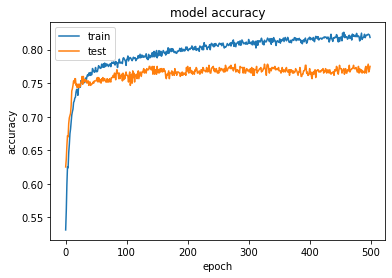

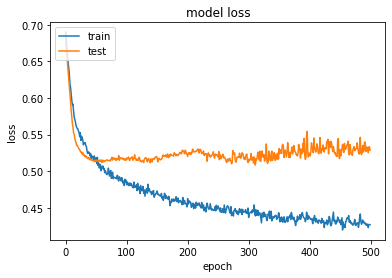

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Dropout=0.5

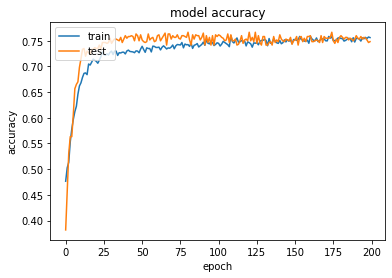

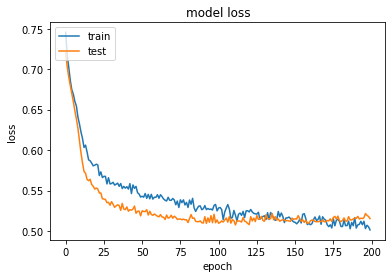

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Dropout=0.7